In [120]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
sns.set()

from sklearn.preprocessing import LabelEncoder, StandardScaler 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report 

# Loading the dataset 

In [121]:
df = pd.read_csv("training_data.csv")

df.head()

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2018-11-15T02:18:49Z,2,0
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2018-11-15T02:19:08Z,2,0
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,ProviderId_6,ProductId_1,airtime,ChannelId_3,500.0,500,2018-11-15T02:44:21Z,2,0
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,20000.0,21800,2018-11-15T03:32:55Z,2,0
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-644.0,644,2018-11-15T03:34:21Z,2,0


In [122]:
df.shape

(95662, 16)

In [123]:
#check the summary of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95662 entries, 0 to 95661
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   TransactionId         95662 non-null  object 
 1   BatchId               95662 non-null  object 
 2   AccountId             95662 non-null  object 
 3   SubscriptionId        95662 non-null  object 
 4   CustomerId            95662 non-null  object 
 5   CurrencyCode          95662 non-null  object 
 6   CountryCode           95662 non-null  int64  
 7   ProviderId            95662 non-null  object 
 8   ProductId             95662 non-null  object 
 9   ProductCategory       95662 non-null  object 
 10  ChannelId             95662 non-null  object 
 11  Amount                95662 non-null  float64
 12  Value                 95662 non-null  int64  
 13  TransactionStartTime  95662 non-null  object 
 14  PricingStrategy       95662 non-null  int64  
 15  FraudResult        

In [124]:
#check for null values 
df.isna().sum()

TransactionId           0
BatchId                 0
AccountId               0
SubscriptionId          0
CustomerId              0
CurrencyCode            0
CountryCode             0
ProviderId              0
ProductId               0
ProductCategory         0
ChannelId               0
Amount                  0
Value                   0
TransactionStartTime    0
PricingStrategy         0
FraudResult             0
dtype: int64

In [125]:
#there are no null values, let us check for duplicate values 
df.duplicated().sum()

0

In [126]:
#there are no duplicated values, we can go ahead and look at the statistical summary of the data 
df.describe()

,CountryCode,Amount,Value,PricingStrategy,FraudResult
count,95662.0,9.566200e+04,9.566200e+04,95662.000000,95662.000000
mean,256.0,6.717846e+03,9.900584e+03,2.255974,0.002018
std,0.0,1.233068e+05,1.231221e+05,0.732924,0.044872
min,256.0,-1.000000e+06,2.000000e+00,0.000000,0.000000
25%,256.0,-5.000000e+01,2.750000e+02,2.000000,0.000000
50%,256.0,1.000000e+03,1.000000e+03,2.000000,0.000000
75%,256.0,2.800000e+03,5.000000e+03,2.000000,0.000000
max,256.0,9.880000e+06,9.880000e+06,4.000000,1.000000


In [127]:
#we need to change Transaction time from object datatype to datetime format 
df["TransactionStartTime"] = pd.to_datetime(df["TransactionStartTime"])

In [128]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95662 entries, 0 to 95661
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype              
---  ------                --------------  -----              
 0   TransactionId         95662 non-null  object             
 1   BatchId               95662 non-null  object             
 2   AccountId             95662 non-null  object             
 3   SubscriptionId        95662 non-null  object             
 4   CustomerId            95662 non-null  object             
 5   CurrencyCode          95662 non-null  object             
 6   CountryCode           95662 non-null  int64              
 7   ProviderId            95662 non-null  object             
 8   ProductId             95662 non-null  object             
 9   ProductCategory       95662 non-null  object             
 10  ChannelId             95662 non-null  object             
 11  Amount                95662 non-null  float64            
 12  Valu

# Feature Engeneering 

In [129]:
#We want to extract the month and day from the TransactionStartTime column 
df["Month"] = df["TransactionStartTime"].dt.month
df["Day"] = df["TransactionStartTime"].dt.day

In [130]:
df.head()

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult,Month,Day
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2018-11-15 02:18:49+00:00,2,0,11,15
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2018-11-15 02:19:08+00:00,2,0,11,15
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,ProviderId_6,ProductId_1,airtime,ChannelId_3,500.0,500,2018-11-15 02:44:21+00:00,2,0,11,15
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,20000.0,21800,2018-11-15 03:32:55+00:00,2,0,11,15
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-644.0,644,2018-11-15 03:34:21+00:00,2,0,11,15


In [131]:
#we create here a function that will check the rows, which we will state in the next linw of code to classify our data into debit and credit 
#In this function, anything less than 1 is debit and anything else is credit 
def credit(row):
    if row < 1:
        return 0  #represents debit
    else:
        return 1  #represents credit 

In [132]:
#the fumction is executed along the column for Amount 
df["IsCredit"] = df["Amount"].apply(credit)

In [133]:
df.head()

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult,Month,Day,IsCredit
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2018-11-15 02:18:49+00:00,2,0,11,15,1
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2018-11-15 02:19:08+00:00,2,0,11,15,0
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,ProviderId_6,ProductId_1,airtime,ChannelId_3,500.0,500,2018-11-15 02:44:21+00:00,2,0,11,15,1
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,20000.0,21800,2018-11-15 03:32:55+00:00,2,0,11,15,1
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-644.0,644,2018-11-15 03:34:21+00:00,2,0,11,15,0


In [134]:
df["IsCredit"].value_counts()

IsCredit
1    57473
0    38189
Name: count, dtype: int64

0  -- Deebit 

1  -- Credit 

In [135]:
df["AccountId"].value_counts()

AccountId
AccountId_4841    30893
AccountId_4249     4457
AccountId_4840     1738
AccountId_3206     1105
AccountId_318      1070
                  ...  
AccountId_4180        1
AccountId_63          1
AccountId_3497        1
AccountId_2010        1
AccountId_1685        1
Name: count, Length: 3633, dtype: int64

In [136]:
df.columns 

Index(['TransactionId', 'BatchId', 'AccountId', 'SubscriptionId', 'CustomerId',
       'CurrencyCode', 'CountryCode', 'ProviderId', 'ProductId',
       'ProductCategory', 'ChannelId', 'Amount', 'Value',
       'TransactionStartTime', 'PricingStrategy', 'FraudResult', 'Month',
       'Day', 'IsCredit'],
      dtype='object')

In [137]:
#we can now split the data for training and testing 
X = df.drop(columns = ['TransactionId', 'CurrencyCode', 'CountryCode','Amount', 'TransactionStartTime', 'FraudResult'])

X

,BatchId,AccountId,SubscriptionId,CustomerId,ProviderId,ProductId,ProductCategory,ChannelId,Value,PricingStrategy,Month,Day,IsCredit
0,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000,2,11,15,1
1,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,ProviderId_4,ProductId_6,financial_services,ChannelId_2,20,2,11,15,0
2,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,ProviderId_6,ProductId_1,airtime,ChannelId_3,500,2,11,15,1
3,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,21800,2,11,15,1
4,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,ProviderId_4,ProductId_6,financial_services,ChannelId_2,644,2,11,15,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95657,BatchId_96668,AccountId_4841,SubscriptionId_3829,CustomerId_3078,ProviderId_4,ProductId_6,financial_services,ChannelId_2,1000,2,2,13,0
95658,BatchId_3503,AccountId_3439,SubscriptionId_2643,CustomerId_3874,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000,2,2,13,1
95659,BatchId_118602,AccountId_4841,SubscriptionId_3829,CustomerId_3874,ProviderId_4,ProductId_6,financial_services,ChannelId_2,20,2,2,13,0
95660,BatchId_70924,AccountId_1346,SubscriptionId_652,CustomerId_1709,ProviderId_6,ProductId_19,tv,ChannelId_3,3000,2,2,13,1


In [138]:
Y = df["FraudResult"]

Y

0        0
1        0
2        0
3        0
4        0
        ..
95657    0
95658    0
95659    0
95660    0
95661    0
Name: FraudResult, Length: 95662, dtype: int64

# Feature Encoding 

In [139]:
#we want to create a list of categorical columns, that is, those columns that are not numerical 

cat_cols = X.select_dtypes(include=["object"]).columns.tolist()

cat_cols

['BatchId',
 'AccountId',
 'SubscriptionId',
 'CustomerId',
 'ProviderId',
 'ProductId',
 'ProductCategory',
 'ChannelId']

In [140]:
le = LabelEncoder()
for col in cat_cols:
    X[col] = le.fit_transform(X[col])

In [141]:
X.head()

,BatchId,AccountId,SubscriptionId,CustomerId,ProviderId,ProductId,ProductCategory,ChannelId,Value,PricingStrategy,Month,Day,IsCredit
0,46980,2490,3535,2584,5,1,0,2,1000,2,11,15,1
1,31755,3219,2366,2584,3,19,2,1,20,2,11,15,0
2,60272,2713,996,2806,5,0,0,2,500,2,11,15,1
3,1797,3351,974,3733,0,11,8,2,21800,2,11,15,1
4,48941,3219,2366,3733,3,19,2,1,644,2,11,15,0


# Feature Correlation 

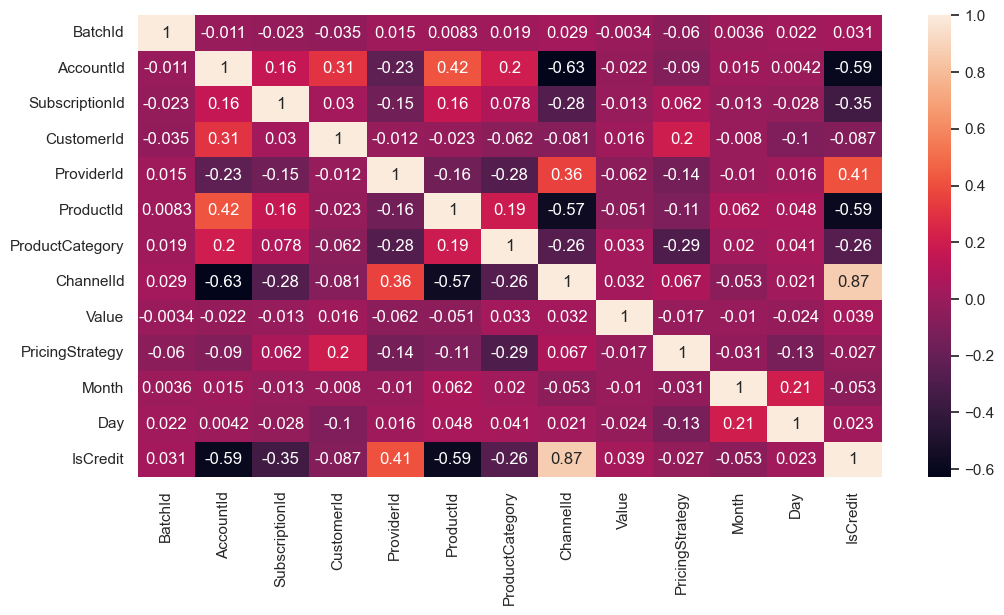

In [142]:
plt.figure(figsize = (12, 6))
sns.heatmap(X.corr(), annot = True)
plt.show()

# Feature Scaling 

In [143]:
scaler = StandardScaler()
scaledX = scaler.fit_transform(X)

In [144]:
scaledX

array([[-0.01556319,  0.1537132 ,  1.6686459 , ...,  0.84868424,
        -0.10073863,  0.81514939],
       [-0.57173322,  0.86719027,  0.34644914, ...,  0.84868424,
        -0.10073863, -1.22676899],
       [ 0.46999424,  0.37196476, -1.20308855, ...,  0.84868424,
        -0.10073863,  0.81514939],
       ...,
       [-1.22430605,  0.86719027,  0.34644914, ..., -0.87404014,
        -0.32388379, -1.22676899],
       [ 0.93546015, -1.99356897,  1.45261547, ..., -0.87404014,
        -0.32388379,  0.81514939],
       [-0.19708102,  0.86719027,  0.34644914, ..., -0.87404014,
        -0.32388379, -1.22676899]])

In [145]:
Y.value_counts()

FraudResult
0    95469
1      193
Name: count, dtype: int64

The dataset is highly imbalanced 

In [147]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

In [149]:
log = LogisticRegression()
log.fit(X_train, Y_train)

C:\Users\OBED\New folder\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [150]:
log_preds = log.predict(X_test)

In [151]:
accuracy_score(Y_test, log_preds)

0.9983797627136362

In [154]:
print(classification_report(Y_test, log_preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     19097
           1       0.69      0.25      0.37        36

    accuracy                           1.00     19133
   macro avg       0.85      0.62      0.68     19133
weighted avg       1.00      1.00      1.00     19133

